<a href="https://colab.research.google.com/github/salim4n/kaggle_competition/blob/main/Carpiquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
df = pd.read_csv("/content/station.csv")
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,4.14,4.22,5.99,7.91,12.20,15.01,16.32,18.12,15.20,11.10,7.31,5.67,4.37,8.70,16.48,11.20,10.19
1,1974,7.10,6.13,6.77,9.18,11.03,14.36,15.87,16.64,13.38,8.40,8.45,8.66,6.30,8.99,15.62,10.08,10.25
2,1975,7.98,5.74,5.71,8.71,10.41,14.44,17.49,19.07,15.17,10.53,7.12,3.55,7.46,8.28,17.00,10.94,10.92
3,1976,5.78,4.95,6.03,8.06,13.21,17.43,19.13,18.12,15.21,12.10,7.62,3.52,4.76,9.10,18.23,11.64,10.93
4,1977,4.18,7.42,8.27,7.99,11.28,13.26,16.27,15.60,13.45,12.77,7.99,7.49,5.04,9.18,15.04,11.40,10.17


In [3]:
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
46,2019,5.21,7.46,9.16,9.76,11.96,16.61,19.01,18.66,16.16,13.01,7.96,7.09,6.88,10.29,18.09,12.38,11.91
47,2020,6.89,8.39,7.94,12.19,13.09,16.24,17.84,20.04,16.94,12.24,9.94,6.93,7.46,11.07,18.04,13.04,12.40
48,2021,5.13,6.48,7.68,7.33,11.68,16.78,18.13,17.23,17.33,12.83,8.28,7.56,6.18,8.90,17.38,12.81,11.32
49,2022,5.71,7.56,9.21,9.86,14.21,16.96,19.71,19.96,16.31,15.11,10.46,5.00,6.94,11.09,18.88,13.96,12.72
50,2023,6.75,6.90,9.35,10.05,13.20,18.00,18.25,999.90,999.90,999.90,999.90,999.90,6.22,10.87,18.50,999.90,12.16


## Créer Serie Temporelle

In [5]:
temps = df.loc[:,"JAN":"DEC"]

In [9]:
series = []

for i, row in temps.iterrows():
  series = series +(list(row))


In [10]:
print(series)

[4.14, 4.22, 5.99, 7.91, 12.2, 15.01, 16.32, 18.12, 15.2, 11.1, 7.31, 5.67, 7.1, 6.13, 6.77, 9.18, 11.03, 14.36, 15.87, 16.64, 13.38, 8.4, 8.45, 8.66, 7.98, 5.74, 5.71, 8.71, 10.41, 14.44, 17.49, 19.07, 15.17, 10.53, 7.12, 3.55, 5.78, 4.95, 6.03, 8.06, 13.21, 17.43, 19.13, 18.12, 15.21, 12.1, 7.62, 3.52, 4.18, 7.42, 8.27, 7.99, 11.28, 13.26, 16.27, 15.6, 13.45, 12.77, 7.99, 7.49, 4.34, 3.77, 7.65, 7.88, 11.62, 13.68, 15.63, 15.2, 14.66, 12.79, 9.22, 5.23, 0.51, 3.39, 6.25, 8.4, 10.82, 13.84, 16.57, 15.54, 14.43, 12.0, 8.22, 7.1, 2.04, 7.07, 5.91, 8.66, 11.23, 14.48, 15.54, 17.17, 15.52, 10.37, 6.59, 5.19, 5.61, 3.36, 9.62, 8.42, 11.82, 13.86, 16.18, 16.95, 15.09, 10.55, 8.55, 4.91, 4.77, 5.86, 6.29, 8.91, 13.22, 17.12, 17.45, 17.11, 16.56, 11.33, 8.86, 5.33, 7.33, 2.04, 6.77, 8.17, 11.44, 15.31, 20.21, 17.92, 16.26, 11.86, 8.36, 5.58, 6.04, 5.21, 6.12, 9.41, 10.02, 15.11, 18.3, 18.78, 15.38, 12.17, 9.84, 5.61, 0.88, 3.22, 5.81, 9.41, 11.78, 14.37, 17.74, 16.01, 15.93, 11.55, 5.25, 7.08

In [11]:
len(series)

612

In [13]:
series = series[:-7]

In [14]:
len(series)

605

In [15]:
series = np.array(series)

In [16]:
series.shape

(605,)

In [19]:
np.argmax(series)

197

In [21]:
series[197] = (series[196] + series[198])/2

In [22]:
series[197]

16.635

## Data Visualisation

In [17]:
import matplotlib.pyplot as plt


In [23]:
time = np.arange(len(series))

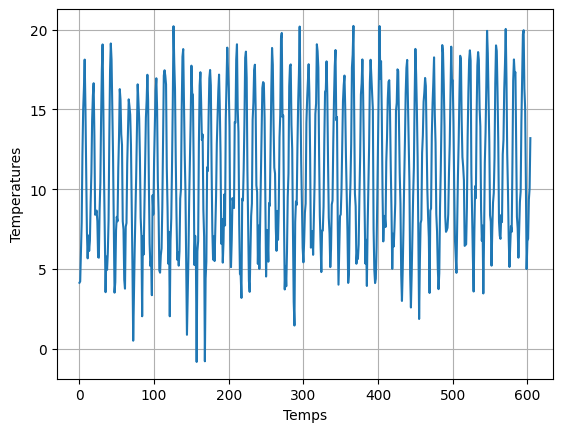

In [25]:
plt.plot(time, series)
plt.xlabel('Temps')
plt.ylabel('Temperatures')
plt.grid(True)
plt.show()

## Baseline

In [26]:
# train test split
time_train = time[:505]
x_train = series[:505]
time_test = time[505:]
x_test = series[505:]

In [27]:
years = df['YEAR'].tolist()

In [29]:
505/12

42.083333333333336

In [30]:
years[43] # 1973-2016 train, 2016-2023

2016

In [31]:
# approche naive
pred_naive = series[504: -1]

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_absolute_error(x_test, pred_naive)

2.372

In [35]:
mean_squared_error(x_test, pred_naive)

8.010130000000002

## Window Dataset

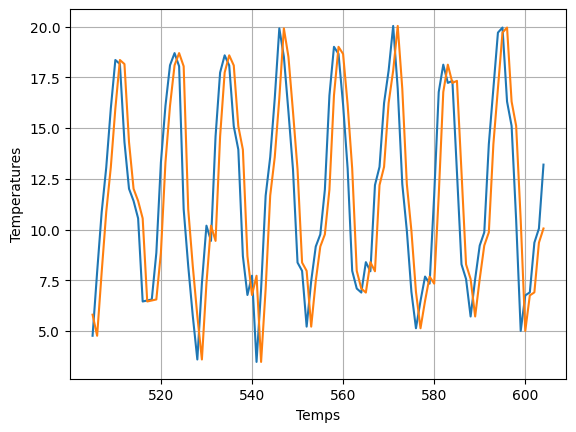

In [36]:
plt.plot(time_test, x_test)
plt.plot(time_test, pred_naive)
plt.xlabel('Temps')
plt.ylabel('Temperatures')
plt.grid(True)
plt.show()

In [48]:
dataset = tf.data.Dataset.range(10)

In [49]:
dataset

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [50]:
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))

In [51]:
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [52]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

In [53]:
for x, y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] 4
[1 2 3 4] 5
[2 3 4 5] 6
[3 4 5 6] 7
[4 5 6 7] 8
[5 6 7 8] 9


In [54]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1]))
dataset = dataset.shuffle(buffer_size=10)

dataset = dataset.batch(2).prefetch(1)

In [55]:
for x, y in dataset:
  print(x.numpy(), y.numpy())

[[3 4 5 6]
 [2 3 4 5]] [7 6]
[[4 5 6 7]
 [0 1 2 3]] [8 4]
[[5 6 7 8]
 [1 2 3 4]] [9 5]


In [56]:
dataset = tf.data.Dataset.from_tensor_slices(series)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1]))
dataset = dataset.shuffle(buffer_size=len(series))

dataset = dataset.batch(32).prefetch(1)

In [57]:
def windowed_dataset(series, window_size, batch_size):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))
  # dataset = dataset.shuffle(buffer_size=len(series))

  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [58]:
window_size = 24
batch_size = 32
dataset = windowed_dataset(x_train, window_size, batch_size)
test_dataset = windowed_dataset(x_test, window_size, batch_size)

## Neural Network

In [59]:
for feature, label in test_dataset.take(1):
  print(feature.shape)
  print(label.shape)

(32, 24)
(32,)


In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[24], activation='relu'),
    tf.keras.layers.Dense(10,  activation='relu'),
    tf.keras.layers.Dense(1)
])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                250       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [63]:
model.fit(dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
16/16 [==============================] - 2s 56ms/step - loss: 325.0974 - val_loss: 181.2849
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 88.8615 - val_loss: 46.8254
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 35.5635 - val_loss: 28.4797
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 27.5931 - val_loss: 23.3627
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 23.5437 - val_loss: 19.7626
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 20.4795 - val_loss: 17.1733
Epoch 7/100
16/16 [==============================] - 0s 20ms/step - loss: 18.1184 - val_loss: 15.0904
Epoch 8/100
16/16 [==============================] - 0s 17ms/step - loss: 16.2022 - val_loss: 13.3588
Epoch 9/100
16/16 [==============================] - 0s 17ms/step - loss: 14.5660 - val_loss: 11.9192
Epoch 10/100
16/16 [==============================] - 0s 16ms/step - loss: 13.1760

## Prediction avec le reseaux de neurones

In [64]:
series[505-24:505].shape

(24,)

In [65]:
r = model.predict(series[505-24:505].reshape(1, -1))

1/1 [==============================] - 0s 327ms/step


In [66]:
r.item()

5.210093021392822

In [67]:
forecast = []

for time in range(505-24, 605-24):

  series_to_predict = series[time: time+24].reshape(1, -1)
  r = model.predict(series_to_predict)
  forecast.append(r.item())

1/1 [==============================] - 0s 22ms/step


In [68]:
print(forecast)

[5.210093021392822, 7.958572864532471, 10.653363227844238, 14.537188529968262, 15.886713027954102, 17.851133346557617, 17.420854568481445, 15.06246280670166, 13.383822441101074, 10.455038070678711, 7.093405723571777, 5.84612512588501, 7.07796049118042, 8.42587947845459, 11.544142723083496, 12.98417854309082, 16.801652908325195, 17.735027313232422, 18.109956741333008, 15.446930885314941, 13.56461238861084, 10.313840866088867, 7.526360034942627, 5.945129871368408, 4.568459987640381, 8.439387321472168, 10.032832145690918, 13.868430137634277, 15.852923393249512, 16.801298141479492, 16.614517211914062, 16.631206512451172, 15.070344924926758, 10.97758960723877, 6.670674800872803, 6.00601053237915, 4.6526665687561035, 8.652168273925781, 12.617502212524414, 12.417562484741211, 18.188884735107422, 18.54360580444336, 17.40593147277832, 16.030366897583008, 11.613106727600098, 10.925361633300781, 5.412458419799805, 3.9114060401916504, 7.6702141761779785, 7.634169101715088, 12.723615646362305, 14.8

In [69]:
forecast = np.array(forecast)

mae :  1.2811750400543216
mse :  2.456687023237761


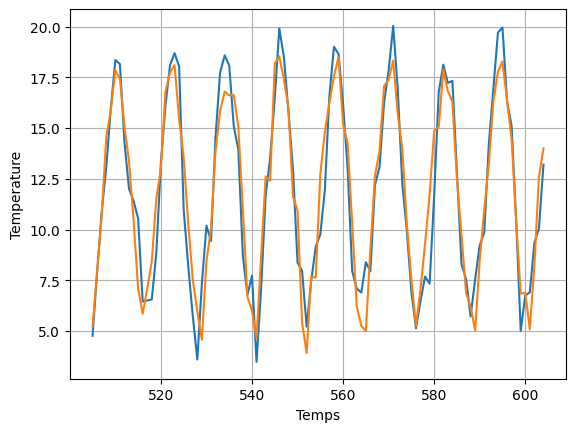

In [70]:
print('mae : ', mean_absolute_error(x_test, forecast))
print('mse : ', mean_squared_error(x_test, forecast))
plt.plot(time_test, x_test)
plt.plot(time_test, forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

## Reseaux Convolutionnels CNN

In [71]:
series.shape

(605,)

In [72]:
series.reshape(-1, 1).shape

(605, 1)

In [73]:
def windowed_dataset(series, window_size, batch_size):
  series = series.reshape(-1, 1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))
  # dataset = dataset.shuffle(buffer_size=len(series))

  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [74]:
dataset = windowed_dataset(x_train, window_size, batch_size)
test_dataset = windowed_dataset(x_test, window_size, batch_size)

In [75]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='causal', input_shape=[None, 1],
                           activation='relu'),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 128)         512       
                                                                 
 dense_3 (Dense)             (None, None, 28)          3612      
                                                                 
 dense_4 (Dense)             (None, None, 10)          290       
                                                                 
 dense_5 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 4,425
Trainable params: 4,425
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
16/16 [==============================] - 2s 68ms/step - loss: 136.9878 - val_loss: 153.9785
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 133.3716 - val_loss: 147.7046
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 127.3718 - val_loss: 139.9495
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 120.7176 - val_loss: 131.9221
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 113.9371 - val_loss: 124.0041
Epoch 6/100
16/16 [==============================] - 0s 18ms/step - loss: 107.3460 - val_loss: 116.3789
Epoch 7/100
16/16 [==============================] - 0s 16ms/step - loss: 101.0320 - val_loss: 109.1087
Epoch 8/100
16/16 [==============================] - 0s 19ms/step - loss: 95.0472 - val_loss: 102.2665
Epoch 9/100
16/16 [==============================] - 0s 18ms/step - loss: 89.4284 - val_loss: 95.8016
Epoch 10/100
16/16 [==============================] - 0s 10ms/step - l

In [78]:
def predict_dataset(model, series, window_size):

  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size))

  # dataset = dataset.shuffle(buffer_size=len(series))

  dataset = dataset.batch(32).prefetch(1)
  forecast = model.predict(dataset)

  return forecast

In [79]:
x_test

array([ 4.76,  7.9 , 10.86, 13.06, 15.96, 18.36, 18.16, 14.31, 12.01,
       11.41, 10.55,  6.45,  6.5 ,  6.55,  8.85, 13.3 , 16.1 , 18.1 ,
       18.7 , 18.05, 11.  ,  8.2 ,  5.74,  3.59,  7.34, 10.19,  9.44,
       14.59, 17.74, 18.59, 18.09, 15.09, 13.94,  8.69,  6.77,  7.72,
        3.47,  7.07, 11.67, 13.57, 16.47, 19.92, 18.52, 15.82, 12.97,
        8.37,  7.96,  5.21,  7.46,  9.16,  9.76, 11.96, 16.61, 19.01,
       18.66, 16.16, 13.01,  7.96,  7.09,  6.89,  8.39,  7.94, 12.19,
       13.09, 16.24, 17.84, 20.04, 16.94, 12.24,  9.94,  6.93,  5.13,
        6.48,  7.68,  7.33, 11.68, 16.78, 18.13, 17.23, 17.33, 12.83,
        8.28,  7.56,  5.71,  7.56,  9.21,  9.86, 14.21, 16.96, 19.71,
       19.96, 16.31, 15.11, 10.46,  5.  ,  6.75,  6.9 ,  9.35, 10.05,
       13.2 ])

In [80]:
series[505-24:-1].shape

(123,)

In [81]:
cnn_forecast = predict_dataset(model, series[505-24:-1], window_size)

4/4 [==============================] - 0s 19ms/step


In [82]:
cnn_forecast.shape

(100, 24, 1)

In [83]:
results = cnn_forecast[:, -1, 0]

mae :  3.8750955642700196
mse :  20.16529502047154


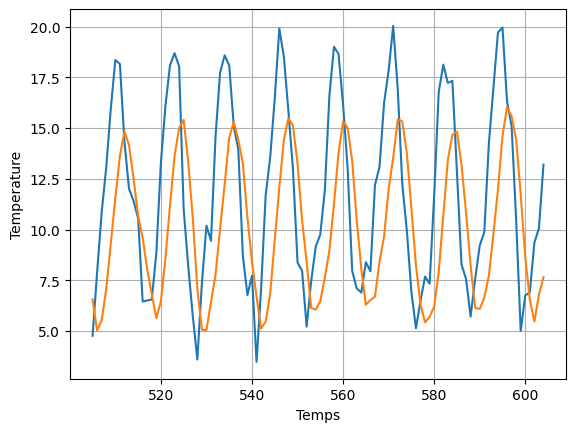

In [84]:
print('mae : ', mean_absolute_error(x_test, results))
print('mse : ', mean_squared_error(x_test, results))
plt.plot(time_test, x_test)
plt.plot(time_test, results)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

## Reseaux de Neurones Recurrents RNN

In [85]:
model = tf.keras.models.Sequential([

    tf.keras.layers.SimpleRNN(100, input_shape=[None, 1], return_sequences=True),
    tf.keras.layers.SimpleRNN(100),
    tf.keras.layers.Dense(1)
])

In [86]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
16/16 [==============================] - 3s 43ms/step - loss: 10.9049 - val_loss: 11.8212
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 10.8651 - val_loss: 11.7718
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 10.8150 - val_loss: 11.7188
Epoch 4/100
16/16 [==============================] - 0s 20ms/step - loss: 10.7632 - val_loss: 11.6653
Epoch 5/100
16/16 [==============================] - 0s 21ms/step - loss: 10.7113 - val_loss: 11.6118
Epoch 6/100
16/16 [==============================] - 0s 20ms/step - loss: 10.6595 - val_loss: 11.5586
Epoch 7/100
16/16 [==============================] - 0s 22ms/step - loss: 10.6080 - val_loss: 11.5056
Epoch 8/100
16/16 [==============================] - 0s 23ms/step - loss: 10.5568 - val_loss: 11.4528
Epoch 9/100
16/16 [==============================] - 0s 20ms/step - loss: 10.5058 - val_loss: 11.4003
Epoch 10/100
16/16 [==============================] - 0s 21ms/step - loss: 10.4552

In [87]:
rnn_forecast = predict_dataset(model, series[505-24:-1], window_size)

4/4 [==============================] - 0s 15ms/step


In [88]:
rnn_forecast = rnn_forecast[:, 0]

In [89]:
x_test.shape


(100,)

mae :  8.395990461730957
mse :  90.59984227116527


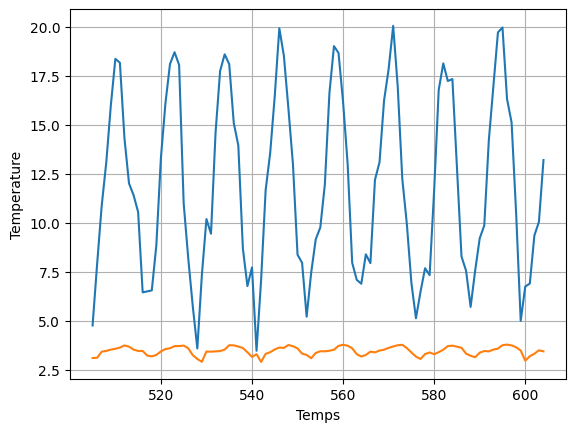

In [90]:
print('mae : ', mean_absolute_error(x_test, rnn_forecast))
print('mse : ', mean_squared_error(x_test, rnn_forecast))
plt.plot(time_test, x_test)
plt.plot(time_test, rnn_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

## RNN Normalized

In [91]:
x_train_scaled = (x_train - x_train.mean()) / x_train.std()
x_test_scaled = (x_test - x_train.mean()) / x_train.std()

In [92]:
dataset = windowed_dataset(x_train_scaled, window_size, batch_size)
test_dataset = windowed_dataset(x_test_scaled, window_size, batch_size)


In [93]:
model = tf.keras.models.Sequential([

    tf.keras.layers.SimpleRNN(100, input_shape=[None, 1], return_sequences=True),
    tf.keras.layers.SimpleRNN(100),
    tf.keras.layers.Dense(1)
])

In [94]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
16/16 [==============================] - 3s 40ms/step - loss: 0.2354 - val_loss: 0.2197
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 0.2330 - val_loss: 0.2171
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 0.2301 - val_loss: 0.2143
Epoch 4/100
16/16 [==============================] - 1s 34ms/step - loss: 0.2270 - val_loss: 0.2116
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 0.2240 - val_loss: 0.2089
Epoch 6/100
16/16 [==============================] - 1s 34ms/step - loss: 0.2211 - val_loss: 0.2062
Epoch 7/100
16/16 [==============================] - 1s 36ms/step - loss: 0.2181 - val_loss: 0.2036
Epoch 8/100
16/16 [==============================] - 1s 32ms/step - loss: 0.2153 - val_loss: 0.2011
Epoch 9/100
16/16 [==============================] - 0s 20ms/step - loss: 0.2125 - val_loss: 0.1986
Epoch 10/100
16/16 [==============================] - 0s 21ms/step - loss: 0.2098 - val_loss: 0.1961

In [95]:
series_scaled = (series - series.mean()) / series.std()

In [96]:
rnn_forecast = predict_dataset(model, series_scaled[505-24:-1], window_size)[:, 0]


4/4 [==============================] - 0s 14ms/step


mae :  0.3601648010272445
mse :  0.1938081249684905


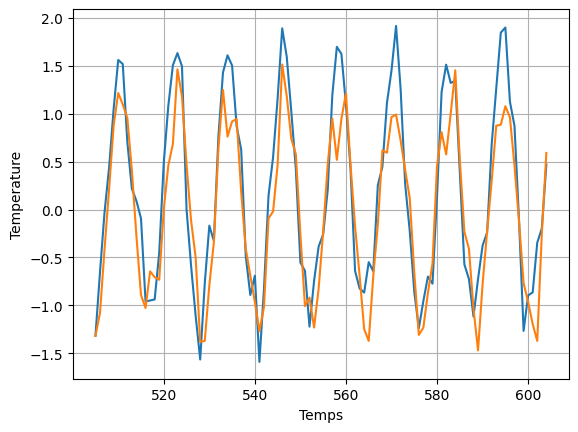

In [97]:
print('mae : ', mean_absolute_error(x_test_scaled, rnn_forecast))
print('mse : ', mean_squared_error(x_test_scaled, rnn_forecast))
plt.plot(time_test, x_test_scaled)
plt.plot(time_test, rnn_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

## GRU

In [98]:
model = tf.keras.models.Sequential([

    tf.keras.layers.GRU(100, input_shape=[None, 1], return_sequences=True, dropout=0.1),
    tf.keras.layers.GRU(100),
    tf.keras.layers.Dense(1)
])

In [99]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
16/16 [==============================] - 6s 110ms/step - loss: 0.4561 - val_loss: 0.4445
Epoch 2/100
16/16 [==============================] - 1s 40ms/step - loss: 0.4563 - val_loss: 0.4445
Epoch 3/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4561 - val_loss: 0.4445
Epoch 4/100
16/16 [==============================] - 1s 73ms/step - loss: 0.4556 - val_loss: 0.4445
Epoch 5/100
16/16 [==============================] - 1s 54ms/step - loss: 0.4556 - val_loss: 0.4445
Epoch 6/100
16/16 [==============================] - 1s 41ms/step - loss: 0.4557 - val_loss: 0.4445
Epoch 7/100
16/16 [==============================] - 1s 41ms/step - loss: 0.4561 - val_loss: 0.4445
Epoch 8/100
16/16 [==============================] - 1s 42ms/step - loss: 0.4560 - val_loss: 0.4445
Epoch 9/100
16/16 [==============================] - 1s 40ms/step - loss: 0.4559 - val_loss: 0.4445
Epoch 10/100
16/16 [==============================] - 1s 42ms/step - loss: 0.4558 - val_loss: 0.444

In [100]:
gru_forecast = predict_dataset(model, series_scaled[505-24:-1], window_size)[:, 0]

4/4 [==============================] - 1s 17ms/step


mae :  0.8532871758996018
mse :  0.9783351665399959


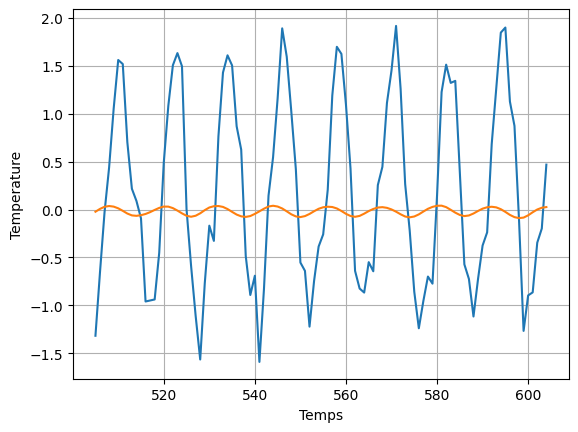

In [101]:
print('mae : ', mean_absolute_error(x_test_scaled, gru_forecast))
print('mse : ', mean_squared_error(x_test_scaled, gru_forecast))
plt.plot(time_test, x_test_scaled)
plt.plot(time_test, gru_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

## LSTM

In [102]:
model = tf.keras.models.Sequential([

    tf.keras.layers.LSTM(24, input_shape=[None, 1], return_sequences=True),
    tf.keras.layers.LSTM(24),
    tf.keras.layers.Dense(1)
])


In [103]:
huber = tf.keras.losses.Huber()
model.compile(loss=huber, optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
16/16 [==============================] - 5s 81ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 2/100
16/16 [==============================] - 0s 24ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 3/100
16/16 [==============================] - 0s 24ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 4/100
16/16 [==============================] - 1s 42ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 5/100
16/16 [==============================] - 1s 46ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 6/100
16/16 [==============================] - 1s 41ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 7/100
16/16 [==============================] - 0s 24ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 8/100
16/16 [==============================] - 0s 24ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 9/100
16/16 [==============================] - 0s 25ms/step - loss: 0.4742 - val_loss: 0.4606
Epoch 10/100
16/16 [==============================] - 0s 26ms/step - loss: 0.4742 - val_loss: 0.4606

In [104]:
lstm_forecast = predict_dataset(model, series_scaled[505-24:-1], window_size)[:, 0]

4/4 [==============================] - 1s 14ms/step


mae :  0.8752355465798253
mse :  1.0205055558977254


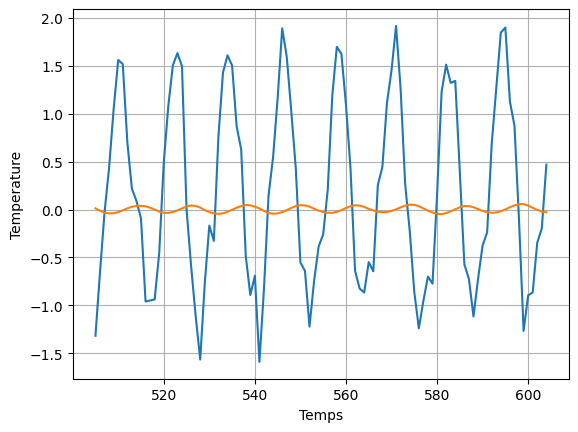

In [105]:

print('mae : ', mean_absolute_error(x_test_scaled, lstm_forecast))
print('mse : ', mean_squared_error(x_test_scaled, lstm_forecast))
plt.plot(time_test, x_test_scaled)
plt.plot(time_test, lstm_forecast)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()